# IMDB

## introdução
---
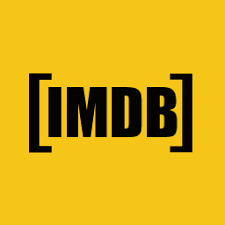

---

Os dados analisados nesse notebook foram extraidos da minha conta pessoal do [IMDB](https://tse3.mm.bing.net/th?id=OIP.NPrBTjZ5scqqgZ4ZBmkWnwHaHa&pid=Api).


## importando bibliotecas e lendo os dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
imdb = pd.read_csv(r'C:\Users\mateu\OneDrive\Documentos\Programação\dados\IMDB_Mateus\ratings.csv', encoding='ISO-8859-1')
#covid_BR_19 = covid_BR_19.drop(columns=['region']).copy()
imdb.head()

,Const,Your Rating,Date Rated,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,tt1010048,8,2016-05-31,Slumdog Millionaire,https://www.imdb.com/title/tt1010048/,movie,8.0,120.0,2008,"Drama, Romance",773545.0,2008-08-30,"Loveleen Tandan, Danny Boyle"
1,tt1024648,8,2017-02-07,Argo,https://www.imdb.com/title/tt1024648/,movie,7.7,120.0,2012,"Biography, Drama, Thriller",554768.0,2012-08-31,Ben Affleck
2,tt0102926,9,2017-01-17,The Silence of the Lambs,https://www.imdb.com/title/tt0102926/,movie,8.6,118.0,1991,"Crime, Drama, Thriller",1203676.0,1991-01-30,Jonathan Demme
3,tt0105236,9,2016-02-17,Reservoir Dogs,https://www.imdb.com/title/tt0105236/,movie,8.3,99.0,1992,"Crime, Drama, Thriller",877192.0,1992-01-21,Quentin Tarantino
4,tt1063669,7,2016-06-06,Die Welle,https://www.imdb.com/title/tt1063669/,movie,7.6,107.0,2008,"Drama, Thriller",98812.0,2008-01-18,Dennis Gansel


## Resumo e preparação dos dados

In [3]:
print(imdb.shape)
print(imdb.columns)
print(imdb.columns.size)

(338, 13)
Index(['Const', 'Your Rating', 'Date Rated', 'Title', 'URL', 'Title Type',
       'IMDb Rating', 'Runtime (mins)', 'Year', 'Genres', 'Num Votes',
       'Release Date', 'Directors'],
      dtype='object')
13


O dataframe análisado tem 13 colunas e 338 filmes ou series registrados

| n° | Coluna | Descrição | Status |
| -- | :------------: | :------------------------------------------------------------------: | :-: |
| 1 | Const | xxxxx | ❌ |
| 2 | Your Rating | A nota que eu dei para o respectivo filme | ✔️ |
| 3 | Date Rated | Data que avaliei. Pode ser util.. | ❓ |
| 4 |Title | Titulo do filme | ✔️ |
| 5 | URL | Url do correspondente ao filme citado no imdb, Pode ser excluida para a analise | ❌ |
| 6 | Title Type | Descreve se é um filme ou uma série | ✔️ |
| 7 | Runtimes | Tempo do filme em minutos | ✔️ |
| 8 | Year | Ano de lançamento do Filme. imformação tmb aparece em 'release date' | ✔️ |
| 9 | Genres | generos associado ao filme | ✔️ |
| 10 | Num votes | Numero de votos do respectivo filme no site | ✔️ |
| 11 | release Date | Dia do lançamento | ✔️ |
| 12 | Directors | Diretor(es) do filme | ✔️ |
| 13 | IMDB Rating | media do filme | ✔️ |

In [4]:
#imdb = imdb.replace(['Date Rated', 'Title Type', 'Num Votes', 'Release Date'], ['data_nota', 'Tipo', 'Num_votes', 'Data_lancamento']) #AS colunas foram renomeadas
imdb = imdb.rename(columns={'Your Rating':'Your_Rating','Date Rated': 'data_nota', 'Runtime (mins)':'Tempo', 'Title Type': 'Tipo', 'IMDb Rating':'IMDb_Rating', 'Num Votes':'Num_votes', 'Release Date':'Data_lancamento'}) #AS colunas foram renomeadas
imdb = imdb.loc[imdb['Tipo'] == 'movie']
imdb = imdb.drop(columns=['Const', 'URL', 'Tipo'])   # As colunas foram excluidas
imdb.head(7)

,Your_Rating,data_nota,Title,IMDb_Rating,Tempo,Year,Genres,Num_votes,Data_lancamento,Directors
0,8,2016-05-31,Slumdog Millionaire,8.0,120.0,2008,"Drama, Romance",773545.0,2008-08-30,"Loveleen Tandan, Danny Boyle"
1,8,2017-02-07,Argo,7.7,120.0,2012,"Biography, Drama, Thriller",554768.0,2012-08-31,Ben Affleck
2,9,2017-01-17,The Silence of the Lambs,8.6,118.0,1991,"Crime, Drama, Thriller",1203676.0,1991-01-30,Jonathan Demme
3,9,2016-02-17,Reservoir Dogs,8.3,99.0,1992,"Crime, Drama, Thriller",877192.0,1992-01-21,Quentin Tarantino
4,7,2016-06-06,Die Welle,7.6,107.0,2008,"Drama, Thriller",98812.0,2008-01-18,Dennis Gansel
5,9,2016-02-17,Jurassic Park,8.1,127.0,1993,"Action, Adventure, Sci-Fi, Thriller",823238.0,1993-06-09,Steven Spielberg
6,8,2019-12-24,The Nightmare Before Christmas,8.0,76.0,1993,"Animation, Family, Fantasy, Musical",280728.0,1993-10-09,Henry Selick


Pronto, agora todos os dados do dataframe 'imdb' são filmes

## 1ª análise
A primeira será feita para responder algumas perguntas simples, como:
1. Quantos filmes no total eu avaliei?
2. Quais os filmes em que eu dei rating maximo(10)?
3. Quais os filmes com os 5 maiores ratings do imdb que eu assiti?
4. Quais os filmes mais populares (mais ratings) que eu assiti?
5. Qual o filme mais antigo e mais recente que eu assiti?
6. Qual o genero que mais assiti?
7. Quantos diretores diferentes dirigiram os 'N' filmes que eu vi? Qual o diretor mais visto?

### 1 - Numero de filmes
Já que cada linha representa um filme, basta verificar quantas linhas possui o dataframe

In [5]:
print(len(imdb))
print('-='*15)
print(imdb.shape)
print('-='*15)
print(imdb.count())

296
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
(296, 10)
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Your_Rating        296
data_nota          296
Title              296
IMDb_Rating        295
Tempo              296
Year               296
Genres             296
Num_votes          295
Data_lancamento    295
Directors          296
dtype: int64


Temos então a resposta a primeir pergunta: Foram avaliados um total de **296** filmes

### 2 - Filmes que eu dei 10 estrelas
Será usado o metodo loc para determinar os filmes

In [6]:
len(imdb.loc[(imdb.Your_Rating == 10)])

23

Foram 23 filmes avaliados com nota máxima

In [7]:
#print(imdb.loc[(imdb.Your_Rating == 10)])
filmes_10 = []
for t in imdb.loc[(imdb.Your_Rating == 10)]['Title']:
    filmes_10.append(t)

print(filmes_10)
print(len(filmes_10))
#imdb.loc[(imdb.Your_Rating == 10)]['Title']

["Schindler's List", 'Forrest Gump', 'Pulp Fiction', 'Se7en', 'Tarzan', 'Fight Club', 'Mad Max: Fury Road', 'Memento', 'About Time', 'Star Wars: Episode VIII - The Last Jedi', 'Arrival', 'Whiplash', 'Cidade de Deus', 'The Hateful Eight', 'La La Land', "Singin' in the Rain", '12 Angry Men', 'The Edge of Democracy', '2001: A Space Odyssey', 'Bingo: O Rei das Manhãs', 'Gisaengchung', 'The Godfather', '1917']
23


### 3 - 5 maiores medias do Imdb
será usado o metod sort_values

In [8]:
imdb.sort_values(by=['IMDb_Rating']).head()

,Your_Rating,data_nota,Title,IMDb_Rating,Tempo,Year,Genres,Num_votes,Data_lancamento,Directors
146,2,2019-10-12,Cinderela Baiana,2.0,85.0,1998,"Comedy, Drama, Family, Music, Romance",337.0,NaN,Conrado Sanchez
55,6,2017-04-12,Fantastic Four,4.3,100.0,2015,"Action, Adventure, Drama, Sci-Fi",145479.0,2015-08-04,Josh Trank
192,5,2018-07-22,Racing Stripes,5.2,102.0,2005,"Adventure, Comedy, Drama, Family, Sport",15372.0,2005-01-06,Frederik Du Chau
236,7,2017-11-29,Unaccompanied Minors,5.3,90.0,2006,"Adventure, Comedy, Family, Romance",10109.0,2006-11-30,Paul Feig
63,4,2016-02-16,Trespass,5.3,91.0,2011,"Crime, Drama, Thriller",40576.0,2011-09-14,Joel Schumacher


Acima podemos ver os 5 piores

In [9]:
imdb.sort_values(by=['IMDb_Rating'], ascending=False).head()

,Your_Rating,data_nota,Title,IMDb_Rating,Tempo,Year,Genres,Num_votes,Data_lancamento,Directors
13,9,2016-02-16,The Shawshank Redemption,9.3,142.0,1994,Drama,2219970.0,1994-09-10,Frank Darabont
284,10,2016-02-16,The Godfather,9.2,175.0,1972,"Crime, Drama",1529699.0,1972-03-14,Francis Ford Coppola
226,9,2017-08-05,The Dark Knight,9.0,152.0,2008,"Action, Crime, Drama, Thriller",2195609.0,2008-07-14,Christopher Nolan
289,9,2016-02-16,The Godfather: Part II,9.0,202.0,1974,"Crime, Drama",1070987.0,1974-12-12,Francis Ford Coppola
244,10,2016-02-16,12 Angry Men,8.9,96.0,1957,Drama,648721.0,1957-04-10,Sidney Lumet


Agora, podemos ver os 5 melhores: 
- Um sonho de liberdade
- O Poderoso Chefão
- Cavaleiro da trevas
- poderoso chefão 2
- 12 homens e uma sentença

Mas não termina ai. Quando se analisa os proximos da lista, podemos ver que eles tem a mesma nota, e qu o filme 12 homens e uma sentença aparece ali por conta da ordem alfabética.
Por isso, o segundo critério adotado será a popularidade.

In [10]:
imdb.sort_values(by=['IMDb_Rating', 'Num_votes'], ascending=False).head(10)

,Your_Rating,data_nota,Title,IMDb_Rating,Tempo,Year,Genres,Num_votes,Data_lancamento,Directors
13,9,2016-02-16,The Shawshank Redemption,9.3,142.0,1994,Drama,2219970.0,1994-09-10,Frank Darabont
284,10,2016-02-16,The Godfather,9.2,175.0,1972,"Crime, Drama",1529699.0,1972-03-14,Francis Ford Coppola
226,9,2017-08-05,The Dark Knight,9.0,152.0,2008,"Action, Crime, Drama, Thriller",2195609.0,2008-07-14,Christopher Nolan
289,9,2016-02-16,The Godfather: Part II,9.0,202.0,1974,"Crime, Drama",1070987.0,1974-12-12,Francis Ford Coppola
12,10,2016-02-16,Pulp Fiction,8.9,154.0,1994,"Crime, Drama",1741967.0,1994-05-21,Quentin Tarantino
61,9,2016-02-16,The Lord of the Rings: The Return of the King,8.9,201.0,2003,"Adventure, Drama, Fantasy",1573856.0,2003-12-01,Peter Jackson
7,10,2016-02-16,Schindler's List,8.9,195.0,1993,"Biography, Drama, History",1156579.0,1993-11-30,Steven Spielberg
244,10,2016-02-16,12 Angry Men,8.9,96.0,1957,Drama,648721.0,1957-04-10,Sidney Lumet
257,9,2017-03-23,O.J.: Made in America,8.9,467.0,2016,"Documentary, Biography, Crime, History",16199.0,2016-01-22,Ezra Edelman
45,9,2016-02-16,Inception,8.8,148.0,2010,"Action, Adventure, Sci-Fi, Thriller",1946703.0,2010-07-08,Christopher Nolan


### 4 - Mais populares
Da mesma forma que no item anterior podemos descobrir os filmes mais populares

In [11]:
imdb.sort_values(by=['Num_votes'], ascending=False).head(10)

,Your_Rating,data_nota,Title,IMDb_Rating,Tempo,Year,Genres,Num_votes,Data_lancamento,Directors
13,9,2016-02-16,The Shawshank Redemption,9.3,142.0,1994,Drama,2219970.0,1994-09-10,Frank Darabont
226,9,2017-08-05,The Dark Knight,9.0,152.0,2008,"Action, Crime, Drama, Thriller",2195609.0,2008-07-14,Christopher Nolan
45,9,2016-02-16,Inception,8.8,148.0,2010,"Action, Adventure, Sci-Fi, Thriller",1946703.0,2010-07-08,Christopher Nolan
44,10,2016-02-16,Fight Club,8.8,139.0,1999,Drama,1770043.0,1999-09-10,David Fincher
12,10,2016-02-16,Pulp Fiction,8.9,154.0,1994,"Crime, Drama",1741967.0,1994-05-21,Quentin Tarantino
8,10,2016-02-16,Forrest Gump,8.8,142.0,1994,"Drama, Romance",1712858.0,1994-06-23,Robert Zemeckis
41,9,2016-02-16,The Matrix,8.7,136.0,1999,"Action, Sci-Fi",1595666.0,1999-03-24,"Lilly Wachowski, Lana Wachowski"
29,8,2016-02-16,The Lord of the Rings: The Fellowship of the Ring,8.8,178.0,2001,"Action, Adventure, Drama, Fantasy",1586371.0,2001-12-10,Peter Jackson
61,9,2016-02-16,The Lord of the Rings: The Return of the King,8.9,201.0,2003,"Adventure, Drama, Fantasy",1573856.0,2003-12-01,Peter Jackson
284,10,2016-02-16,The Godfather,9.2,175.0,1972,"Crime, Drama",1529699.0,1972-03-14,Francis Ford Coppola


In [12]:
imdb.sort_values(by=['Num_votes']).head()

,Your_Rating,data_nota,Title,IMDb_Rating,Tempo,Year,Genres,Num_votes,Data_lancamento,Directors
86,7,2017-04-03,"Carne, Osso",8.6,66.0,2011,"Documentary, Drama, News",18.0,2011-03-31,"Carlos Juliano Barros, Caio Cavechini"
206,8,2017-10-18,A Lei da Água (Novo Código Florestal),8.8,78.0,2015,"Documentary, History",36.0,2015-03-31,André D'Elia
43,7,2017-01-28,Cassiopéia,6.8,80.0,1996,"Family, Adventure, Animation, Sci-Fi",187.0,1996-06-23,Clóvis Vieira
112,7,2017-12-05,La Vingança,6.4,90.0,2016,Comedy,197.0,2016-10-07,Fernando Fraiha
146,2,2019-10-12,Cinderela Baiana,2.0,85.0,1998,"Comedy, Drama, Family, Music, Romance",337.0,NaN,Conrado Sanchez


### 5 Mais antigo e mais recente

In [13]:
imdb.sort_values(by=['Data_lancamento'], ascending=True).head()

,Your_Rating,data_nota,Title,IMDb_Rating,Tempo,Year,Genres,Num_votes,Data_lancamento,Directors
163,8,2016-06-24,The Great Dictator,8.4,125.0,1940,"Comedy, Drama, War",191964.0,1940-10-15,Charles Chaplin
162,9,2017-04-15,Fantasia,7.8,125.0,1940,"Animation, Family, Fantasy, Music",85107.0,1940-11-13,"Samuel Armstrong, Ben Sharpsteen, Paul Satterf..."
176,8,2017-02-10,Casablanca,8.5,102.0,1942,"Drama, Romance, War",499073.0,1942-11-26,Michael Curtiz
218,10,2017-01-27,Singin' in the Rain,8.3,103.0,1952,"Comedy, Musical, Romance",207831.0,1952-03-27,"Gene Kelly, Stanley Donen"
252,8,2017-01-09,Det sjunde inseglet,8.2,96.0,1957,"Drama, Fantasy",153610.0,1957-02-16,Ingmar Bergman


In [14]:
imdb.sort_values(by=['Data_lancamento'], ascending=False).head()

,Your_Rating,data_nota,Title,IMDb_Rating,Tempo,Year,Genres,Num_votes,Data_lancamento,Directors
123,6,2020-03-21,Star Wars: Episode IX - The Rise of Skywalker,6.7,142.0,2019,"Action, Adventure, Fantasy, Sci-Fi",298615.0,2019-12-16,J.J. Abrams
164,8,2020-02-02,Little Women,7.9,135.0,2019,"Drama, Romance",91677.0,2019-12-07,Greta Gerwig
318,10,2020-02-08,1917,8.4,119.0,2019,"Drama, War",277446.0,2019-12-04,Sam Mendes
39,8,2020-01-22,The Irishman,7.9,209.0,2019,"Biography, Crime, Drama",275415.0,2019-09-27,Martin Scorsese
129,9,2020-01-16,Jojo Rabbit,7.9,108.0,2019,"Comedy, Drama, War",192181.0,2019-09-08,Taika Waititi


Vemos dois filmes do ano de 1940: O grande ditador de charles Chaplin e Fantasia da Disney
Os filmes mais recentes foram lançados em 2019

#### Desafio
como desafio separarei os filmes do mes de fevereiro(02) e de anos pares hahaha

In [15]:
print(imdb.Data_lancamento.dtypes)
imdb['Data_lancamento'] = pd.to_datetime(imdb.Data_lancamento)
print(imdb.Data_lancamento.dtypes)

object
datetime64[ns]


In [16]:
imdb.loc[imdb.Data_lancamento.dt.month == 2]

,Your_Rating,data_nota,Title,IMDb_Rating,Tempo,Year,Genres,Num_votes,Data_lancamento,Directors
18,7,2017-01-25,Trainspotting,8.1,93.0,1996,Drama,613242.0,1996-02-23,Danny Boyle
141,8,2018-04-14,Annihilation,6.9,115.0,2018,"Adventure, Drama, Horror, Mystery, Sci-Fi, Thr...",259311.0,2018-02-13,Alex Garland
153,8,2016-04-19,Zootopia,8.0,108.0,2016,"Animation, Adventure, Comedy, Crime, Family, M...",409972.0,2016-02-11,"Rich Moore, Jared Bush, Byron Howard"
166,8,2017-04-29,Logan,8.1,137.0,2017,"Action, Drama, Sci-Fi, Thriller",609034.0,2017-02-17,James Mangold
174,8,2016-09-14,50 First Dates,6.8,99.0,2004,"Comedy, Drama, Romance",315063.0,2004-02-03,Peter Segal
189,7,2017-08-04,Kong: Skull Island,6.6,118.0,2017,"Action, Adventure, Fantasy, Sci-Fi",255648.0,2017-02-28,Jordan Vogt-Roberts
196,6,2017-04-05,Taegukgi hwinalrimyeo,8.1,140.0,2004,"Action, Drama, War",36746.0,2004-02-03,Je-kyu Kang
252,8,2017-01-09,Det sjunde inseglet,8.2,96.0,1957,"Drama, Fantasy",153610.0,1957-02-16,Ingmar Bergman
253,7,2019-02-02,Isle of Dogs,7.9,101.0,2018,"Animation, Adventure, Comedy, Drama, Fantasy, ...",126213.0,2018-02-15,Wes Anderson
297,8,2016-02-17,Taxi Driver,8.3,114.0,1976,"Crime, Drama",683952.0,1976-02-08,Martin Scorsese


Acima podemos ver os filmes q foram lançado no mês de fevereiro

In [17]:
imdb.loc[(imdb.Data_lancamento.dt.month == 2) & ((imdb.Data_lancamento.dt.year % 2)==0)]

,Your_Rating,data_nota,Title,IMDb_Rating,Tempo,Year,Genres,Num_votes,Data_lancamento,Directors
18,7,2017-01-25,Trainspotting,8.1,93.0,1996,Drama,613242.0,1996-02-23,Danny Boyle
141,8,2018-04-14,Annihilation,6.9,115.0,2018,"Adventure, Drama, Horror, Mystery, Sci-Fi, Thr...",259311.0,2018-02-13,Alex Garland
153,8,2016-04-19,Zootopia,8.0,108.0,2016,"Animation, Adventure, Comedy, Crime, Family, M...",409972.0,2016-02-11,"Rich Moore, Jared Bush, Byron Howard"
174,8,2016-09-14,50 First Dates,6.8,99.0,2004,"Comedy, Drama, Romance",315063.0,2004-02-03,Peter Segal
196,6,2017-04-05,Taegukgi hwinalrimyeo,8.1,140.0,2004,"Action, Drama, War",36746.0,2004-02-03,Je-kyu Kang
253,7,2019-02-02,Isle of Dogs,7.9,101.0,2018,"Animation, Adventure, Comedy, Drama, Fantasy, ...",126213.0,2018-02-15,Wes Anderson
297,8,2016-02-17,Taxi Driver,8.3,114.0,1976,"Crime, Drama",683952.0,1976-02-08,Martin Scorsese


### 6 Genero mais assitido

In [18]:
teste = imdb['Genres'].str.cat(sep=', ').split(', ')#.unique()#.sort()

len(teste)
len(list(set(teste)))

Generos = sorted(list(set(teste)))
Generos

n = []
for Genero in Generos:
    n.append(teste.count(Genero))
n

[64,
 68,
 17,
 53,
 58,
 47,
 27,
 204,
 18,
 35,
 1,
 23,
 8,
 15,
 6,
 28,
 4,
 34,
 67,
 20,
 69,
 28,
 6]

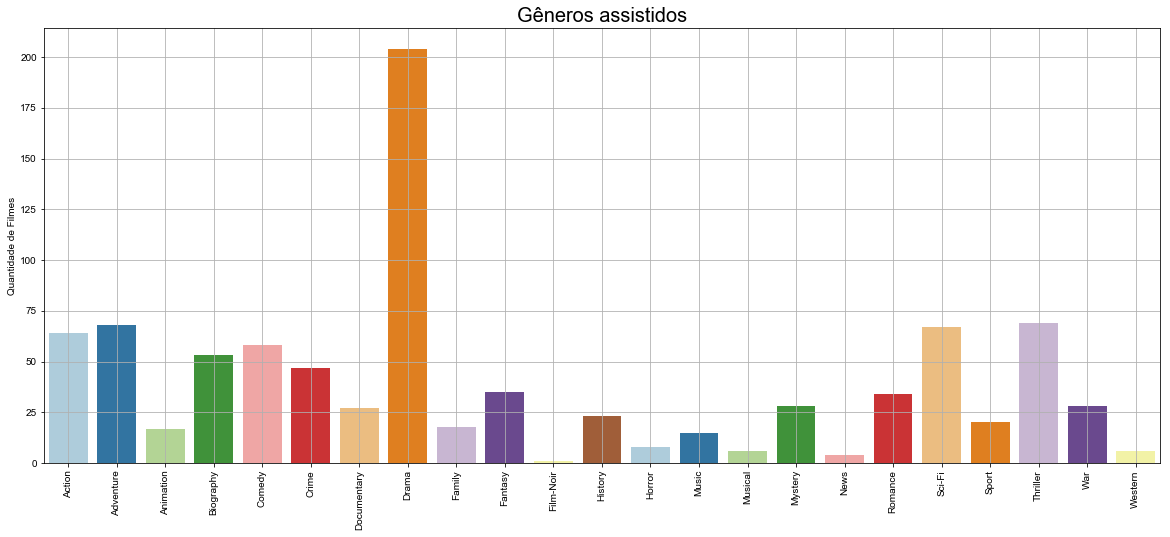

In [19]:
fig, ax = plt.subplots(1,1,figsize=(20, 8))
sns.barplot(x=Generos, y=n, palette='Paired')   #plot do grafico
sns.set_context("notebook")
sns.set(rc={"font.size":10,"axes.labelsize":17})
ax.set_xticklabels(Generos)                                                    #Definindo os valores do eixo x
ax.set_xticks(np.arange(len(Generos)))                                         #
ax.set_ylabel('Quantidade de Filmes')                                        #nome do eixo Y  
plt.xticks(rotation=90)                                                            #rotação do valores do eixo x    4
ax.set_title('Gêneros assistidos', fontsize=20)         #titulo do grafico
ax.grid(True)


plt.show()

Se verifica pelo gráfico que o Genero mais assitido foi o drama  
Tambem se destaca com mais de 50, os generos de ação, Aventura, Biografias, Comédia, Sci-Fi e Thriller  
O genero menos visto foi o Noir - apenas 1.

### 7 Diretores

In [20]:
d = imdb['Directors'].str.cat(sep=', ').split(', ')

diretores = sorted(list(set(d)))
print(diretores)
print(len(diretores))
print('-='*10)

diret = []
n1 = []
for diretor in diretores:
    if d.count(diretor)>3:
        diret.append(diretor)
        n1.append(d.count(diretor))
print(n1)
print(diret)

['Aaron Sorkin', 'Adam McKay', 'Adrian Molina', 'Afonso Poyart', 'Alejandro G. Iñárritu', 'Alex Garland', 'Alexander Payne', 'Alfonso Cuarón', 'Andrzej Wajda', "André D'Elia", 'Ang Lee', 'Anna Muylaert', 'Anthony Russo', 'Anthony Wonke', 'Ari Folman', 'Asif Kapadia', 'Barry Jenkins', 'Ben Affleck', 'Ben Sharpsteen', 'Ben Stiller', 'Benjamin Turner', 'Benny Safdie', 'Bill Roberts', 'Bob Persichetti', 'Bong Joon Ho', 'Bradley Cooper', 'Brian De Palma', 'Bryan Fogel', 'Bryan Singer', 'Byron Howard', 'Caio Cavechini', 'Carla Garapedian', 'Carlos Juliano Barros', 'Cary Joji Fukunaga', 'Charles Chaplin', 'Charles Stone III', 'Chris Buck', 'Chris Paine', 'Chris Smith', 'Christopher Miller', 'Christopher Nolan', 'Clare Lewins', 'Clint Eastwood', 'Clóvis Vieira', 'Conrado Sanchez', 'Damien Chazelle', 'Dan Gilroy', 'Daniel Espinosa', 'Daniel J. Clark', 'Daniel Rezende', 'Danis Tanovic', 'Danny Boyle', 'Darren Aronofsky', 'David Ayer', 'David Fincher', 'David Hand', 'David Leitch', 'David Mackenz

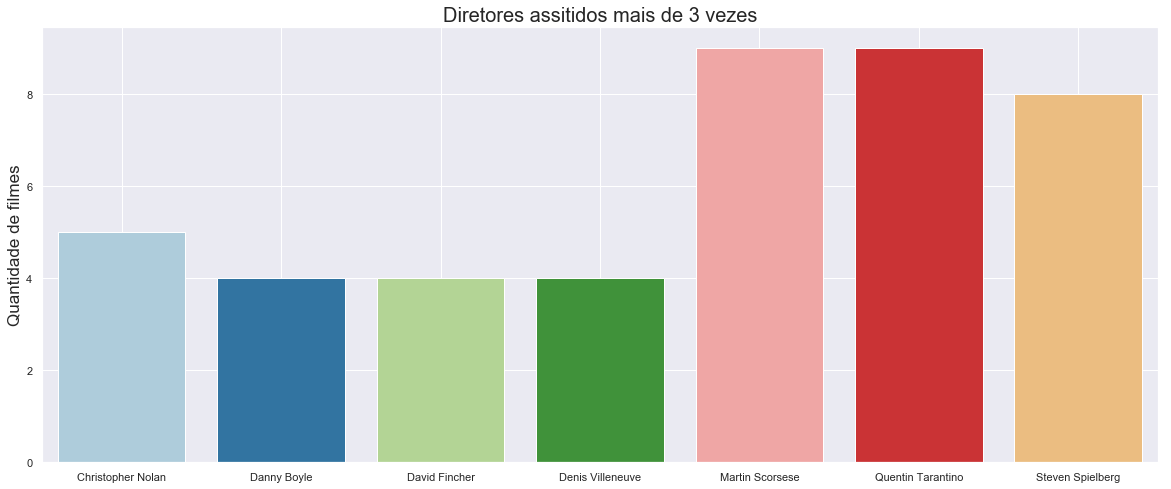

In [21]:
fig, ax = plt.subplots(1,1,figsize=(20, 8))
sns.barplot(x=diret, y=n1, palette='Paired')   #plot do grafico
sns.set_context("notebook")
sns.set(rc={"font.size":10,"axes.labelsize":17})
ax.set_xticklabels(diret)                                                    #Definindo os valores do eixo x
ax.set_xticks(np.arange(len(diret)))                                         #
ax.set_ylabel('Quantidade de filmes')                                        #nome do eixo Y 
plt.xticks(rotation=0)                                                            #rotação do valores do eixo x    4
ax.set_title('Diretores assitidos mais de 3 vezes', fontsize=20)         #titulo do grafico
ax.grid(True)


plt.show()

Foram 256 diretores diferentes nos 296 filmes assitidos.  
E através dos graficos podemos concluir que os diretores mais assitidos foram Martin Scorsese e Quentin Tarantino com 9 filmes cada.  
me lembro claramente quais são os 9 filmes do Tarantino, mas não lembro dos filmes do scorsese. Então decidi separar quais são esses filmes.  
Issi fica mais fácil porque todos os filmes foram dirigidos somente por ele.

In [22]:
imdb.loc[imdb.Directors=='Martin Scorsese']

,Your_Rating,data_nota,Title,IMDb_Rating,Tempo,Year,Genres,Num_votes,Data_lancamento,Directors
39,8,2020-01-22,The Irishman,7.9,209.0,2019,"Biography, Crime, Drama",275415.0,2019-09-27,Martin Scorsese
103,7,2017-01-01,Gangs of New York,7.5,167.0,2002,"Crime, Drama",389093.0,2002-12-09,Martin Scorsese
171,8,2016-03-13,The Aviator,7.5,170.0,2004,"Biography, Drama",321225.0,2004-12-14,Martin Scorsese
205,9,2016-06-06,The Departed,8.5,151.0,2006,"Crime, Drama, Thriller",1133678.0,2006-09-26,Martin Scorsese
238,7,2017-03-04,Silence,7.2,161.0,2016,"Drama, History",93740.0,2016-11-29,Martin Scorsese
297,8,2016-02-17,Taxi Driver,8.3,114.0,1976,"Crime, Drama",683952.0,1976-02-08,Martin Scorsese
309,8,2016-07-09,Raging Bull,8.2,129.0,1980,"Biography, Drama, Sport",306187.0,1980-11-13,Martin Scorsese
336,9,2016-02-17,The Wolf of Wall Street,8.2,180.0,2013,"Biography, Crime, Drama",1105629.0,2013-12-09,Martin Scorsese
337,7,2017-03-07,Goodfellas,8.7,146.0,1990,"Biography, Crime, Drama",966262.0,1990-09-09,Martin Scorsese


In [23]:
imdb.loc[imdb.Directors.str.contains(",", na=False)].head()
#imdb.Directors.str.contains(",")

,Your_Rating,data_nota,Title,IMDb_Rating,Tempo,Year,Genres,Num_votes,Data_lancamento,Directors
0,8,2016-05-31,Slumdog Millionaire,8.0,120.0,2008,"Drama, Romance",773545.0,2008-08-30,"Loveleen Tandan, Danny Boyle"
9,9,2016-02-16,The Lion King,8.5,88.0,1994,"Animation, Adventure, Drama, Family, Musical",896970.0,1994-06-12,"Rob Minkoff, Roger Allers"
11,7,2016-02-19,Il postino,7.7,108.0,1994,"Biography, Comedy, Drama, Romance",31992.0,1994-09-01,"Massimo Troisi, Michael Radford"
20,7,2016-05-15,The Big Lebowski,8.1,117.0,1998,"Comedy, Crime, Sport",695947.0,1998-01-18,"Ethan Coen, Joel Coen"
31,10,2016-11-22,Tarzan,7.3,88.0,1999,"Animation, Adventure, Family, Romance",193591.0,1999-06-12,"Kevin Lima, Chris Buck"


Desta forma podemos ver todos os filmes com mais de um diretor.
E com o mesmo metodo podemos ver os filmes de um diretor em especifico

In [24]:
imdb.loc[imdb.Directors.str.contains("Boyle", na=False)].head()

,Your_Rating,data_nota,Title,IMDb_Rating,Tempo,Year,Genres,Num_votes,Data_lancamento,Directors
0,8,2016-05-31,Slumdog Millionaire,8.0,120.0,2008,"Drama, Romance",773545.0,2008-08-30,"Loveleen Tandan, Danny Boyle"
18,7,2017-01-25,Trainspotting,8.1,93.0,1996,Drama,613242.0,1996-02-23,Danny Boyle
95,8,2016-02-16,Steve Jobs,7.2,122.0,2015,"Biography, Drama",146438.0,2015-09-05,Danny Boyle
305,8,2019-12-05,Yesterday,6.8,116.0,2019,"Comedy, Fantasy, Music, Musical, Romance",89133.0,2019-05-04,Danny Boyle


## 2ª análise
A primeira será feita para responder algumas perguntas simples, como:  
1. 

---

## Extras
### Styling
Aqui vão ser feitos alguns testes com o styling

In [25]:
Styling01 = imdb.sort_values(by=['IMDb_Rating']).head().style.hide_index().hide_columns(['Tempo', 'Genres','Data_lancamento']) 
Styling01

Your_Rating,data_nota,Title,IMDb_Rating,Year,Num_votes,Directors
2,2019-10-12,Cinderela Baiana,2,1998,337,Conrado Sanchez
6,2017-04-12,Fantastic Four,4.3,2015,145479,Josh Trank
5,2018-07-22,Racing Stripes,5.2,2005,15372,Frederik Du Chau
7,2017-11-29,Unaccompanied Minors,5.3,2006,10109,Paul Feig
4,2016-02-16,Trespass,5.3,2011,40576,Joel Schumacher


In [26]:
Styling01.highlight_min(subset='IMDb_Rating', color='Red')

Your_Rating,data_nota,Title,IMDb_Rating,Year,Num_votes,Directors
2,2019-10-12,Cinderela Baiana,2,1998,337,Conrado Sanchez
6,2017-04-12,Fantastic Four,4.3,2015,145479,Josh Trank
5,2018-07-22,Racing Stripes,5.2,2005,15372,Frederik Du Chau
7,2017-11-29,Unaccompanied Minors,5.3,2006,10109,Paul Feig
4,2016-02-16,Trespass,5.3,2011,40576,Joel Schumacher


In [27]:
Styling01.background_gradient(cmap='Wistia')

Your_Rating,data_nota,Title,IMDb_Rating,Year,Num_votes,Directors
2,2019-10-12,Cinderela Baiana,2,1998,337,Conrado Sanchez
6,2017-04-12,Fantastic Four,4.3,2015,145479,Josh Trank
5,2018-07-22,Racing Stripes,5.2,2005,15372,Frederik Du Chau
7,2017-11-29,Unaccompanied Minors,5.3,2006,10109,Paul Feig
4,2016-02-16,Trespass,5.3,2011,40576,Joel Schumacher


In [28]:
imdb.head(10).style.set_properties(**{'background-color' : 'yellow',
                            'color' : 'black',
                            'border-color' : 'black'})

,Your_Rating,data_nota,Title,IMDb_Rating,Tempo,Year,Genres,Num_votes,Data_lancamento,Directors
0,8,2016-05-31,Slumdog Millionaire,8,120,2008,"Drama, Romance",773545,2008-08-30 00:00:00,"Loveleen Tandan, Danny Boyle"
1,8,2017-02-07,Argo,7.7,120,2012,"Biography, Drama, Thriller",554768,2012-08-31 00:00:00,Ben Affleck
2,9,2017-01-17,The Silence of the Lambs,8.6,118,1991,"Crime, Drama, Thriller",1.20368e+06,1991-01-30 00:00:00,Jonathan Demme
3,9,2016-02-17,Reservoir Dogs,8.3,99,1992,"Crime, Drama, Thriller",877192,1992-01-21 00:00:00,Quentin Tarantino
4,7,2016-06-06,Die Welle,7.6,107,2008,"Drama, Thriller",98812,2008-01-18 00:00:00,Dennis Gansel
5,9,2016-02-17,Jurassic Park,8.1,127,1993,"Action, Adventure, Sci-Fi, Thriller",823238,1993-06-09 00:00:00,Steven Spielberg
6,8,2019-12-24,The Nightmare Before Christmas,8,76,1993,"Animation, Family, Fantasy, Musical",280728,1993-10-09 00:00:00,Henry Selick
7,10,2016-02-16,Schindler's List,8.9,195,1993,"Biography, Drama, History",1.15658e+06,1993-11-30 00:00:00,Steven Spielberg
8,10,2016-02-16,Forrest Gump,8.8,142,1994,"Drama, Romance",1.71286e+06,1994-06-23 00:00:00,Robert Zemeckis
9,9,2016-02-16,The Lion King,8.5,88,1994,"Animation, Adventure, Drama, Family, Musical",896970,1994-06-12 00:00:00,"Rob Minkoff, Roger Allers"


In [29]:
imdb.head(10).style.set_table_styles([{'selector' : 'tr:hover', 'props' : [('background-color', 'black'),('color', 'yellow')]}])

,Your_Rating,data_nota,Title,IMDb_Rating,Tempo,Year,Genres,Num_votes,Data_lancamento,Directors
0,8,2016-05-31,Slumdog Millionaire,8,120,2008,"Drama, Romance",773545,2008-08-30 00:00:00,"Loveleen Tandan, Danny Boyle"
1,8,2017-02-07,Argo,7.7,120,2012,"Biography, Drama, Thriller",554768,2012-08-31 00:00:00,Ben Affleck
2,9,2017-01-17,The Silence of the Lambs,8.6,118,1991,"Crime, Drama, Thriller",1.20368e+06,1991-01-30 00:00:00,Jonathan Demme
3,9,2016-02-17,Reservoir Dogs,8.3,99,1992,"Crime, Drama, Thriller",877192,1992-01-21 00:00:00,Quentin Tarantino
4,7,2016-06-06,Die Welle,7.6,107,2008,"Drama, Thriller",98812,2008-01-18 00:00:00,Dennis Gansel
5,9,2016-02-17,Jurassic Park,8.1,127,1993,"Action, Adventure, Sci-Fi, Thriller",823238,1993-06-09 00:00:00,Steven Spielberg
6,8,2019-12-24,The Nightmare Before Christmas,8,76,1993,"Animation, Family, Fantasy, Musical",280728,1993-10-09 00:00:00,Henry Selick
7,10,2016-02-16,Schindler's List,8.9,195,1993,"Biography, Drama, History",1.15658e+06,1993-11-30 00:00:00,Steven Spielberg
8,10,2016-02-16,Forrest Gump,8.8,142,1994,"Drama, Romance",1.71286e+06,1994-06-23 00:00:00,Robert Zemeckis
9,9,2016-02-16,The Lion King,8.5,88,1994,"Animation, Adventure, Drama, Family, Musical",896970,1994-06-12 00:00:00,"Rob Minkoff, Roger Allers"


In [30]:
imdb.head(10).style.set_table_styles([{'selector' : 'tr:hover', 'props' : [('background-color', 'yellow'),('color', 'black')]}])

,Your_Rating,data_nota,Title,IMDb_Rating,Tempo,Year,Genres,Num_votes,Data_lancamento,Directors
0,8,2016-05-31,Slumdog Millionaire,8,120,2008,"Drama, Romance",773545,2008-08-30 00:00:00,"Loveleen Tandan, Danny Boyle"
1,8,2017-02-07,Argo,7.7,120,2012,"Biography, Drama, Thriller",554768,2012-08-31 00:00:00,Ben Affleck
2,9,2017-01-17,The Silence of the Lambs,8.6,118,1991,"Crime, Drama, Thriller",1.20368e+06,1991-01-30 00:00:00,Jonathan Demme
3,9,2016-02-17,Reservoir Dogs,8.3,99,1992,"Crime, Drama, Thriller",877192,1992-01-21 00:00:00,Quentin Tarantino
4,7,2016-06-06,Die Welle,7.6,107,2008,"Drama, Thriller",98812,2008-01-18 00:00:00,Dennis Gansel
5,9,2016-02-17,Jurassic Park,8.1,127,1993,"Action, Adventure, Sci-Fi, Thriller",823238,1993-06-09 00:00:00,Steven Spielberg
6,8,2019-12-24,The Nightmare Before Christmas,8,76,1993,"Animation, Family, Fantasy, Musical",280728,1993-10-09 00:00:00,Henry Selick
7,10,2016-02-16,Schindler's List,8.9,195,1993,"Biography, Drama, History",1.15658e+06,1993-11-30 00:00:00,Steven Spielberg
8,10,2016-02-16,Forrest Gump,8.8,142,1994,"Drama, Romance",1.71286e+06,1994-06-23 00:00:00,Robert Zemeckis
9,9,2016-02-16,The Lion King,8.5,88,1994,"Animation, Adventure, Drama, Family, Musical",896970,1994-06-12 00:00:00,"Rob Minkoff, Roger Allers"


In [31]:
imdb.head(10).style.set_table_styles([{'selector' : 'tr:hover', 
                                  'props' : [('background-color', 'black'),('color', 'white')]}]
                               ).set_properties(**{'background-color' : 'yellow',
                            'color' : 'black',
                            'border-color' : 'black'})

,Your_Rating,data_nota,Title,IMDb_Rating,Tempo,Year,Genres,Num_votes,Data_lancamento,Directors
0,8,2016-05-31,Slumdog Millionaire,8,120,2008,"Drama, Romance",773545,2008-08-30 00:00:00,"Loveleen Tandan, Danny Boyle"
1,8,2017-02-07,Argo,7.7,120,2012,"Biography, Drama, Thriller",554768,2012-08-31 00:00:00,Ben Affleck
2,9,2017-01-17,The Silence of the Lambs,8.6,118,1991,"Crime, Drama, Thriller",1.20368e+06,1991-01-30 00:00:00,Jonathan Demme
3,9,2016-02-17,Reservoir Dogs,8.3,99,1992,"Crime, Drama, Thriller",877192,1992-01-21 00:00:00,Quentin Tarantino
4,7,2016-06-06,Die Welle,7.6,107,2008,"Drama, Thriller",98812,2008-01-18 00:00:00,Dennis Gansel
5,9,2016-02-17,Jurassic Park,8.1,127,1993,"Action, Adventure, Sci-Fi, Thriller",823238,1993-06-09 00:00:00,Steven Spielberg
6,8,2019-12-24,The Nightmare Before Christmas,8,76,1993,"Animation, Family, Fantasy, Musical",280728,1993-10-09 00:00:00,Henry Selick
7,10,2016-02-16,Schindler's List,8.9,195,1993,"Biography, Drama, History",1.15658e+06,1993-11-30 00:00:00,Steven Spielberg
8,10,2016-02-16,Forrest Gump,8.8,142,1994,"Drama, Romance",1.71286e+06,1994-06-23 00:00:00,Robert Zemeckis
9,9,2016-02-16,The Lion King,8.5,88,1994,"Animation, Adventure, Drama, Family, Musical",896970,1994-06-12 00:00:00,"Rob Minkoff, Roger Allers"


---

## Teste

In [32]:
imdb.loc[imdb.Title.str.contains(":", na=False)].head()

,Your_Rating,data_nota,Title,IMDb_Rating,Tempo,Year,Genres,Num_votes,Data_lancamento,Directors
29,8,2016-02-16,The Lord of the Rings: The Fellowship of the Ring,8.8,178.0,2001,"Action, Adventure, Drama, Fantasy",1586371.0,2001-12-10,Peter Jackson
47,10,2016-02-16,Mad Max: Fury Road,8.1,120.0,2015,"Action, Adventure, Sci-Fi, Thriller",831243.0,2015-05-07,George Miller
61,9,2016-02-16,The Lord of the Rings: The Return of the King,8.9,201.0,2003,"Adventure, Drama, Fantasy",1573856.0,2003-12-01,Peter Jackson
62,9,2016-02-16,The Lord of the Rings: The Two Towers,8.7,179.0,2002,"Adventure, Drama, Fantasy",1421356.0,2002-12-05,Peter Jackson
88,8,2019-07-15,Indie Game: The Movie,7.6,103.0,2012,"Documentary, Drama",19909.0,2012-01-20,"Lisanne Pajot, James Swirsky"


In [33]:
#imdb.rename(columns={'Date Rated': 'data_nota', 'Title Type': 'Tipo', 'Num Votes':'Num_votes', 'Release Date':'Data_lancamento'}) #AS colunas foram renomeadas

## fazer
- <s>não consegui alterar o nome na coluna</s>
- 

## Aleatório

In [54]:
import random

moeda = []
for x in range(100):
    cara=0
    coroa=0
    for x in range(10000):
        if random.randint(1,2)==1:
            cara +=1
        else:
            coroa+=1
    moeda.append(cara)
        
print(moeda)

[5010, 5051, 4982, 5038, 4944, 4926, 4996, 4970, 5131, 4992, 4980, 4978, 4956, 4945, 5007, 4960, 4988, 5051, 4962, 5090, 4995, 5003, 4931, 5108, 4967, 4981, 5019, 4995, 5034, 5008, 4960, 4984, 5037, 5010, 5009, 4970, 5026, 4887, 4993, 4992, 4972, 5101, 4959, 4986, 5036, 5020, 5046, 5047, 5025, 5037, 5041, 5049, 5015, 5043, 5027, 4994, 4984, 4986, 4975, 4985, 4995, 4958, 4981, 4955, 5011, 5044, 4977, 4943, 5038, 5032, 4906, 5029, 4996, 4993, 4980, 5003, 4912, 4965, 5021, 5057, 5065, 5091, 5045, 5075, 4975, 4940, 5036, 5179, 5007, 4938, 5053, 5012, 4948, 5033, 5019, 4953, 4951, 4970, 5065, 4973]


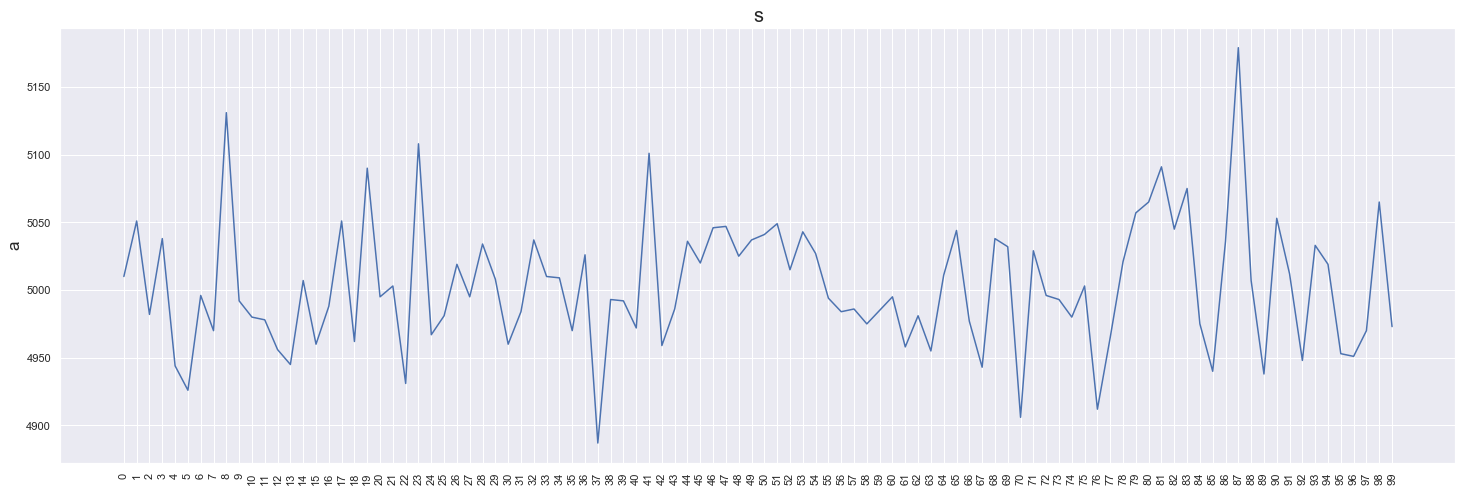

In [58]:
fig, ax = plt.subplots(1,1,figsize=(25, 8))
sns.lineplot(x=range(100), y=moeda, palette='Paired')   #plot do grafico
sns.set_context("notebook")
sns.set(rc={"font.size":10,"axes.labelsize":17})
#ax.set_xticklabels(diret)                                                    #Definindo os valores do eixo x
ax.set_xticks(np.arange(len(moeda)))                                         #
ax.set_ylabel('a')                                        #nome do eixo Y 
plt.xticks(rotation=90)                                                            #rotação do valores do eixo x    4
ax.set_title('s', fontsize=20)         #titulo do grafico
ax.grid(True)


plt.show()